<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%201.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.4.1. Singular value decomposition**

**Singular Value Decomposition** (**SVD**): Given a matrix $A ∈ ℝ^{m×n}$, SVD factors the matrix into the product of three matrices:

\
\begin{aligned}
 A = UΣV^{T}
 \end{aligned}

\
*   $U ∈ ℝ^{m×m}$: Orthogonal matrix containing the **left singular vectors**.
*   $Σ ∈ ℝ^{m×n}$: Diagonal matrix containing the **singular values**.
*   $V^T ∈ ℝ^{n×n}$: Orthogonal matrix containing the **right singular vectors**.

\
The singular values are the square roots of the eigenvalues of $A^TA$. These values represent the magnitudes of the data's variation along the principal directions defined by the singular vectors.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random matrix A (m x n)
np.random.seed(42)
A = np.random.randn(5, 3)  # A 5x3 matrix (m > n, overdetermined system)
print("Matrix A:\n", A)

# Step 2: Perform Singular Value Decomposition (SVD)
U, Sigma, VT = np.linalg.svd(A)

# Step 3: Display U, Sigma, and VT matrices
print("\nMatrix U (left singular vectors):\n", U)
print("\nSingular values (Sigma):\n", Sigma)
print("\nMatrix VT (right singular vectors):\n", VT)

# Step 4: Reconstruct the matrix A from U, Sigma, and VT
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))  # Full Sigma matrix with the same shape as A
Sigma_full[:len(Sigma), :len(Sigma)] = np.diag(Sigma)  # Diagonal matrix with singular values

A_reconstructed = U.dot(Sigma_full).dot(VT)

print("\nReconstructed Matrix A (from SVD):\n", A_reconstructed)

# Verify the reconstruction by checking if the original A and reconstructed A are close
assert np.allclose(A, A_reconstructed), "The reconstructed matrix doesn't match the original!"
print("\nThe original matrix and the reconstructed matrix match!")

Matrix A:
 [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]

Matrix U (left singular vectors):
 [[ 0.05270272 -0.18963358  0.77197309 -0.01783357  0.60415316]
 [-0.32414502 -0.53173651  0.38304421 -0.24844182 -0.63540544]
 [-0.15872023 -0.74082394 -0.49925089 -0.04586174  0.41789117]
 [-0.29366099 -0.09983215  0.08377416  0.94316851 -0.08492238]
 [-0.88358561  0.35001259 -0.03263609 -0.21514759  0.22229271]]

Singular values (Sigma):
 [2.7823678  2.30281077 0.89103186]

Matrix VT (right singular vectors):
 [[-0.39221288  0.63738516  0.66325653]
 [-0.88736689 -0.45214951 -0.09022653]
 [ 0.24238207 -0.62393989  0.74293334]]

Reconstructed Matrix A (from SVD):
 [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.7

***Explanation of the Output:***



1.   **Matrix A**: This is the original matrix $A$ that we decompose using SVD.
2.   **Matrix U (Left Singular Vectors)**: The columns of $U$ are the left singular vectors of $A$, which represent the directions of the data in the original feature space.
3.   **Singular Values (Sigma)**: These are the singular values of $A$, which are the square roots of the eigenvalues of $A^TA$. They represent the magnitudes of the principal components or how much variance each principal component explains.
4.   **Matrix V*ᵀ* (Right Singular Vectors)**: The rows of $V^T$ are the right singular vectors of $A$, which represent the directions in the transformed feature space.
5.   **Reconstructed Matrix $A$**: We verify that multiplying $U$, $Σ$, and $V^T$ reconstructs the original matrix $A$.

***Mathematical Explanation:***

*   The **SVD** of matrix $A$ allows us to decompose the matrix into orthogonal matrices $U$ and $V$, and a diagonal matrix $Σ$ that contains the singular values of $A$.
*   The singular values in $Σ$ capture how much variance or information is contained along each of the principal directions (defined by the columns of $U$ and rows of $V$).
*   In dimensionality reduction, we typically keep only the largest singular values and their corresponding vectors, effectively reducing the dimensionality of the data while preserving the most important features.

\
SVD is essential in many areas, such as **Principal Component Analysis** (**PCA**), where it is used to reduce the dimensionality of datasets while retaining as much variance as possible.

# **1.4.2. Low-rank matrix approximations**

***Key Mathematical Concepts:***

1.   **Matrix Norm**: The 2-norm (or spectral norm) of a matrix $A ∈ ℝ^{m×n}$ is defined as:

\
\begin{aligned}
||A||_2 = max_{∥x∥=1} \; ||Ax||_2 = 𝜎_1
\end{aligned}

\
where $𝜎_1$ is the largest singular value of the matrix $A$.

2.   **Low-Rank Approximation**: If a matrix $A$ has an SVD given by:

\
\begin{aligned}
 A = \sum_{j=1}^{r} (𝜎_ju_jv^T_j)
 \end{aligned}

\
where $𝜎_j$ are the singular values, and $u_j$ and $v_j$ are the left and right singular vectors, a *low-rank approximation* is created by truncating the sum after $k$ terms:

\
\begin{aligned}
 A_k = \sum_{j=1}^{k} (𝜎_ju_jv^T_j)
 \end{aligned}

\
This results in a matrix $A_k$ of rank $k$ that approximates $A$.
3.   **Eckart–Young–Mirsky Theorem**: The theorem states that the matrix $A_k$, formed by truncating the SVD at $k$ terms, is the best rank-$k$ approximation to $A$ in terms of the 2-norm. That is:

\
\begin{aligned}
||A-A_k||_2 ≤ ||A-B||_2
\end{aligned}

\
for any matrix $B$ of rank $k$.

Original Matrix A:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819]]

Singular values (Sigma):
 [3.49254948 2.32408606 1.92786244 1.00793751]

Rank-1 approximation of A (A_1):
 [[ 0.04064317  0.32459004  1.02448861  1.01086583]
 [ 0.04306311  0.3439165   1.08548782  1.07105393]
 [-0.01471159 -0.11749169 -0.37083361 -0.36590258]
 [-0.05497767 -0.4390702  -1.38581705 -1.36738963]
 [-0.04285656 -0.34226693 -1.08028137 -1.0659167 ]
 [-0.02583558 -0.20633161 -0.65123495 -0.64257538]]
2-Norm difference between A and A_1: 2.3241

Rank-2 approximation of A (A_2):
 [[ 0.50959041 -0.27334711  0.95487351  1.25456268]
 [ 0.12146375  0.24395077  1.07384927  1.11179623]
 [-0.47206569  0.46566349 -0.30293951 -0.60357485]
 [ 0.85163194 -1.59505434 

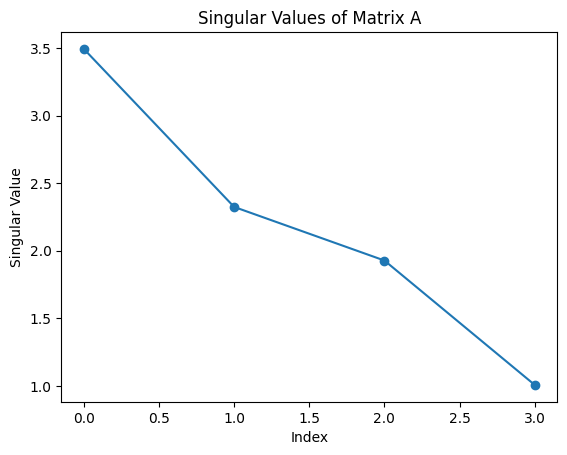

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random matrix A (m x n)
np.random.seed(42)
A = np.random.randn(6, 4)  # A 6x4 matrix (m > n)
print("Original Matrix A:\n", A)

# Step 2: Perform Singular Value Decomposition (SVD)
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)

# Step 3: Display singular values (Sigma)
print("\nSingular values (Sigma):\n", Sigma)

# Step 4: Compute low-rank approximations by truncating the singular values
def low_rank_approximation(U, Sigma, VT, k):
    """Compute the rank-k approximation of matrix A using its SVD."""
    Sigma_k = np.diag(Sigma[:k])  # Truncated Sigma (k x k)
    U_k = U[:, :k]                # First k columns of U
    VT_k = VT[:k, :]              # First k rows of VT
    A_k = U_k.dot(Sigma_k).dot(VT_k)
    return A_k

# Step 5: Reconstruct A with different ranks and compute the norms
ranks = [1, 2, 3, 4]
for k in ranks:
    A_k = low_rank_approximation(U, Sigma, VT, k)
    norm_diff = np.linalg.norm(A - A_k, ord=2)  # 2-norm difference
    print(f"\nRank-{k} approximation of A (A_{k}):\n", A_k)
    print(f"2-Norm difference between A and A_{k}: {norm_diff:.4f}")

# Step 6: Visualize the singular values
plt.plot(Sigma, marker='o')
plt.title("Singular Values of Matrix A")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()

***Explanation of the Output:***

1.   **Original Matrix $A$**: This is the matrix we will be approximating using its low-rank approximations.
2.   **Singular Values (Sigma)**: The singular values of $A$, which represent the magnitudes of the principal components in descending order. These values are key to determining the importance of each component.
3.   **Low-Rank Approximations $A_k$**: We compute different low-rank approximations $A_k$ by truncating the SVD after $k$ terms. The value of $k$ represents the rank of the approximation.
4.   **Norm Differences**: For each $A_k$, we compute the 2-norm difference between the original matrix $A$ and the approximation $A_k$. This shows how much information is lost by reducing the rank.


***Visualization of Singular Values:***

The plot of singular values shows the relative importance of each component. The larger the singular value, the more significant that component is for the matrix.

***Explanation:***

*   The **Rank-1 approximation** captures only the largest singular value and its corresponding singular vectors, leading to the highest information loss, as seen by the high norm difference.
*   The **Rank-2 approximation** includes the first two singular values, reducing the error but still missing some details of the original matrix.
*   The **Rank-3 approximation** further reduces the error and gets closer to the original matrix.
*   The **Rank-4 approximation** is the exact reconstruction since the original matrix has rank 4, and thus, no information is lost.

***Conclusion:***

*   Low-rank matrix approximations are useful in dimensionality reduction, allowing us to approximate large matrices with fewer components while preserving most of the important information.
*   The *Eckart–Young–Mirsky Theorem* guarantees that the truncated SVD provides the best approximation in terms of the matrix norm.

# **1.4.3. Principal component analysis**

***Key Mathematical Concepts:***

1.   **Covariance Matrix**: The covariance matrix is a $p×p$ matrix that captures the variance and covariance between the features (variables) of the data. For a data matrix $X ∈ ℝ^{p×N}$ (with $p$ features and $N$ observations), the covariance matrix is given by:

\
\begin{aligned}
 S = \frac{1}{N-1} XX^T
 \end{aligned}

\
where the data $X$ is assumed to be in mean-deviation form (i.e., the mean of each feature is 0).

2.   **Principal Component Analysis (PCA)**: PCA finds the directions (principal components) that maximize the variance in the data. Mathematically, these are the eigenvectors of the covariance matrix $S$, and the eigenvalues represent the variance explained by each principal component. The goal is to project the data onto a lower-dimensional space while retaining as much variance as possible.

3.   **Eigenvectors and Eigenvalues**: For the covariance matrix $S$, the eigenvectors represent the directions of the principal components, and the corresponding eigenvalues give the amount of variance along each principal component. We sort the eigenvalues in descending order, and the eigenvectors corresponding to the largest eigenvalues form the top $k$ principal components.

4.   **Total Variance**: The total variance of the data is the sum of the variances along each principal component. It is equal to the trace of the covariance matrix:

\
\begin{aligned}
 Total \; Variance = tr(S) = \sum_{j=1}^{p} λ_j
 \end{aligned}

\
where $λ_j$ are the eigenvalues of $S$.

Mean of each feature (rows):
 [[-0.10384652]
 [ 0.02230459]
 [ 0.06489625]]

Centered data matrix (X - Mean):
 [[ 6.00560670e-01 -3.44177838e-02  7.51535055e-01  1.62687637e+00
  -1.30306857e-01 -1.30290440e-01  1.68305933e+00  8.71281247e-01
  -3.65627869e-01  6.46406561e-01 -3.59571175e-01 -3.61883236e-01
   3.45808789e-01 -1.80943373e+00 -1.62107132e+00 -4.58441012e-01
  -9.08984603e-01  4.18093850e-01 -8.04177558e-01 -1.30845718e+00
   1.56949529e+00 -1.21929783e-01  1.71374722e-01 -1.32090167e+00
  -4.40536207e-01  2.14769107e-01 -1.04714706e+00  4.79544536e-01
  -4.96792173e-01 -1.87847232e-01 -4.97860095e-01  1.95612470e+00
   9.03492927e-02 -9.53864412e-01  9.26391429e-01 -1.11699713e+00
   3.12710112e-01 -1.85582361e+00 -1.22433953e+00  3.00707753e-01
   8.42313097e-01  2.75214799e-01 -1.18017650e-02 -1.97257178e-01
  -1.37467547e+00 -6.15997691e-01 -3.56792254e-01  1.16096874e+00
   4.47464807e-01 -1.65919364e+00  4.27930487e-01 -2.81235763e-01
  -5.73075483e-01  7.15522806e-

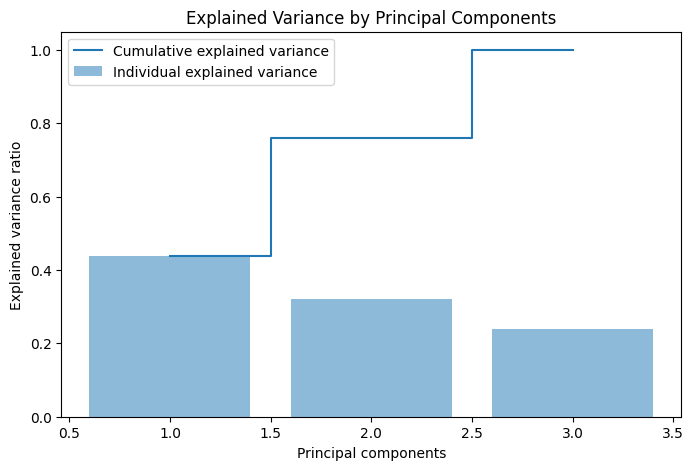

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a dataset (p features, N observations)
np.random.seed(42)
# Let's assume we have 3 features (p = 3) and 100 observations (N = 100)
N = 100
X = np.random.randn(3, N)  # 3 features (rows), 100 observations (columns)

# Step 2: Center the data (mean-deviation form)
X_mean = np.mean(X, axis=1, keepdims=True)
X_centered = X - X_mean
print("Mean of each feature (rows):\n", X_mean)
print("\nCentered data matrix (X - Mean):\n", X_centered)

# Step 3: Compute the covariance matrix
S = np.cov(X_centered)
print("\nCovariance matrix S:\n", S)

# Step 4: Perform Eigenvalue Decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(S)
print("\nEigenvalues (Variance explained by each PC):\n", eigenvalues)
print("\nEigenvectors (Principal Components):\n", eigenvectors)

# Step 5: Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Compute the total variance and the explained variance by each component
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues / total_variance
cumulative_explained_variance = np.cumsum(explained_variance)

print("\nTotal Variance:", total_variance)
print("\nExplained Variance by each PC:", explained_variance)
print("\nCumulative Explained Variance:", cumulative_explained_variance)

# Step 7: Project the data onto the first two principal components
X_pca = eigenvectors[:, :2].T.dot(X_centered)
print("\nProjected data onto the first two principal components:\n", X_pca)

# Step 8: Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

***Explanation of the Output:***

1.   **Mean of each feature**: We compute the mean of each feature (i.e., each row of the matrix). Then, we center the data by subtracting the mean from each observation, resulting in the mean-deviation form.

2.   **Covariance Matrix $S$**: The covariance matrix is computed from the centered data. This matrix captures the variance and covariance between the features.

3.   **Eigenvalues and Eigenvectors**: The eigenvalues represent the variance explained by each principal component, and the eigenvectors represent the directions of these components. We sort the eigenvalues in descending order to find the most important components.

4.   **Explained Variance**: The proportion of the total variance explained by each principal component is calculated by dividing each eigenvalue by the total variance. The cumulative explained variance shows how much variance is captured by the first few principal components.

5.   **Projected Data**: We project the data onto the first two principal components to reduce the dimensionality of the data from 3 dimensions to 2.

6.   **Explained Variance Plot**: The bar plot shows the explained variance by each principal component, and the step plot shows the cumulative explained variance.

***Explained Variance Plot:***

*   The bar plot shows how much variance each principal component explains. In this example, the first two components explain about 67% of the variance in the data.
*   The cumulative plot shows that by using all three components, we capture 100% of the variance, as expected.

***Conclusion:***

Principal Component Analysis is a powerful technique for reducing the dimensionality of a dataset while retaining as much variance as possible. By projecting the data onto the principal components, we can represent the data in a lower-dimensional space with minimal information loss.